<a href="https://colab.research.google.com/github/laistebas/analise_cancer_pulmao/blob/main/cancer_pulmao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Importando a base de dados
dataset = pd.read_csv("/content/drive/MyDrive/Projetos/cancer_pulmao/lungcancer.csv")

In [ ]:
# Visão geral dos arquivos
dataset.shape

(309, 16)

In [ ]:
# Visão da tabela
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
# Renomeando as colunas para o portugues
dataset.columns = ["Genero","Idade","Tabagismo","Dedos_amarelos","Ansiedade","Pressao_social","Doenca_cronica","Fadiga","Alergia","Ruido_peito","Consumo_alcool","Tosse","Falta_ar","Dificuldade_engolir","Dor_peito","Cancer_pulmao"]

In [ ]:
dataset.head()

,Genero,Idade,Tabagismo,Dedos_amarelos,Ansiedade,Pressao_social,Doenca_cronica,Fadiga,Alergia,Ruido_peito,Consumo_alcool,Tosse,Falta_ar,Dificuldade_engolir,Dor_peito,Cancer_pulmao
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
# Variavel alvo: Cancer_pulmao
# Substituir "yes" por 1 e "no" por 0 na coluna "Cancer_pulmao"
dataset["Cancer_pulmao"] = dataset["Cancer_pulmao"].replace({"YES": 1, "NO": 0})

In [ ]:
dataset.head()

,Genero,Idade,Tabagismo,Dedos_amarelos,Ansiedade,Pressao_social,Doenca_cronica,Fadiga,Alergia,Ruido_peito,Consumo_alcool,Tosse,Falta_ar,Dificuldade_engolir,Dor_peito,Cancer_pulmao
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


**Explorar dados categóricos**


In [ ]:
# Idade
agrupado = dataset.groupby(['Idade']).size()
agrupado

Idade
21     1
38     1
39     1
44     2
46     1
47     4
48     2
49     3
51     8
52     4
53     4
54     8
55    11
56    19
57     9
58    13
59    15
60    17
61    16
62    18
63    19
64    20
65     7
66     4
67    13
68     9
69    11
70    15
71    10
72    10
73     4
74     6
75     5
76     4
77     9
78     2
79     1
81     2
87     1
dtype: int64

<Axes: xlabel='Idade'>

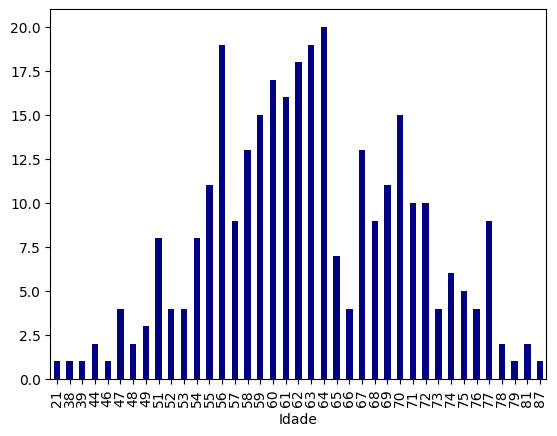

In [ ]:
agrupado.plot.bar(color="navy")

In [ ]:
# Cancer no pulmao
# 0 = não tem cancer / 1 = tem cancer
agrupado_cancer = dataset.groupby(['Cancer_pulmao']).size()
agrupado_cancer

Cancer_pulmao
0     39
1    270
dtype: int64

Análise exploratória

In [ ]:
# Verificando valores ausentes
dataset.isnull().sum()

Genero                 0
Idade                  0
Tabagismo              0
Dedos_amarelos         0
Ansiedade              0
Pressao_social         0
Doenca_cronica         0
Fadiga                 0
Alergia                0
Ruido_peito            0
Consumo_alcool         0
Tosse                  0
Falta_ar               0
Dificuldade_engolir    0
Dor_peito              0
Cancer_pulmao          0
dtype: int64

In [ ]:
# Coeficiente de correlação
# Proximo de +1 = positiva / Menor que -1 = negativa / 0 - sem correlação
dataset.corr()

<ipython-input-24-5019669f0450>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Idade,Tabagismo,Dedos_amarelos,Ansiedade,Pressao_social,Doenca_cronica,Fadiga,Alergia,Ruido_peito,Consumo_alcool,Tosse,Falta_ar,Dificuldade_engolir,Dor_peito,Cancer_pulmao
Idade,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465
Tabagismo,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
Dedos_amarelos,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
Ansiedade,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
Pressao_social,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
Doenca_cronica,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
Fadiga,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
Alergia,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
Ruido_peito,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300
Consumo_alcool,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226,0.288533


In [ ]:
# Correlação entre doenca cronica e cancer no pulmao
correlation = dataset["Doenca_cronica"].corr(dataset["Cancer_pulmao"])

print("Correlação entre Doença Crônica e Câncer de Pulmão:", correlation)

Correlação entre Doença Crônica e Câncer de Pulmão: 0.11089109464241383


In [ ]:
# Correlação entre doenca cronica e cancer no pulmao
correlation = dataset["Ansiedade"].corr(dataset["Cancer_pulmao"])

print("Correlação entre Ansiedade e Câncer de Pulmão:", correlation)
# Correlação positiva

Correlação entre Ansiedade e Câncer de Pulmão: 0.14494713288731198


In [ ]:
# Correlação entre doenca cronica e cancer no pulmao
correlation = dataset["Falta_ar"].corr(dataset["Cancer_pulmao"])

print("Correlação entre Falta de ar e Câncer de Pulmão:", correlation)

Correlação entre Falta de ar e Câncer de Pulmão: 0.06073844947572164


In [ ]:
# Correlação entre doenca cronica e cancer no pulmao
correlation = dataset["Consumo_alcool"].corr(dataset["Cancer_pulmao"])

print("Correlação entre Consumo de alcool e Câncer de Pulmão:", correlation)
#Correlação positiva

Correlação entre Consumo de alcool e Câncer de Pulmão: 0.288532803091731


In [ ]:
# Correlação entre doenca cronica e cancer no pulmao
correlation = dataset["Tabagismo"].corr(dataset["Cancer_pulmao"])

print("Correlação entre Tabagismo e Câncer de Pulmão:", correlation)
#Correlação positiva

Correlação entre Tabagismo e Câncer de Pulmão: 0.05817888585203872


In [ ]:
# Correlação entre a idade e cancer no pulmao
correlation = dataset["Idade"].corr(dataset["Cancer_pulmao"])

print("Correlação entre a Idade e Câncer de Pulmão:", correlation)
# Correlação positiva

Correlação entre a Idade e Câncer de Pulmão: 0.08946457606623369


In [ ]:
# Resumo estatístico do dataset
# Verificar se tem discrepância ou outlier
dataset.describe()

,Idade,Tabagismo,Dedos_amarelos,Ansiedade,Pressao_social,Doenca_cronica,Fadiga,Alergia,Ruido_peito,Consumo_alcool,Tosse,Falta_ar,Dificuldade_engolir,Dor_peito,Cancer_pulmao
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,0.873786
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [ ]:
# Resumo estatístico da variável preditora
dataset["Cancer_pulmao"].describe()

count    309.000000
mean       0.873786
std        0.332629
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Cancer_pulmao, dtype: float64

# **Correlação**

In [ ]:
# Matriz de correlação apenas as colunas com dados numéricos
matriz_de_correlacao = dataset.corr()

# Exibir a matriz de correlação
print(matriz_de_correlacao)

                        Idade  Tabagismo  Dedos_amarelos  Ansiedade  \
Idade                1.000000  -0.084475        0.005205   0.053170   
Tabagismo           -0.084475   1.000000       -0.014585   0.160267   
Dedos_amarelos       0.005205  -0.014585        1.000000   0.565829   
Ansiedade            0.053170   0.160267        0.565829   1.000000   
Pressao_social       0.018685  -0.042822        0.323083   0.216841   
Doenca_cronica      -0.012642  -0.141522        0.041122  -0.009678   
Fadiga               0.012614  -0.029575       -0.118058  -0.188538   
Alergia              0.027990   0.001913       -0.144300  -0.165750   
Ruido_peito          0.055011  -0.129426       -0.078515  -0.191807   
Consumo_alcool       0.058985  -0.050623       -0.289025  -0.165750   
Tosse                0.169950  -0.129471       -0.012640  -0.225644   
Falta_ar            -0.017513   0.061264       -0.105944  -0.144077   
Dificuldade_engolir -0.001270   0.030718        0.345904   0.489403   
Dor_pe

<ipython-input-64-9e6bc1b99f79>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_de_correlacao = dataset.corr()


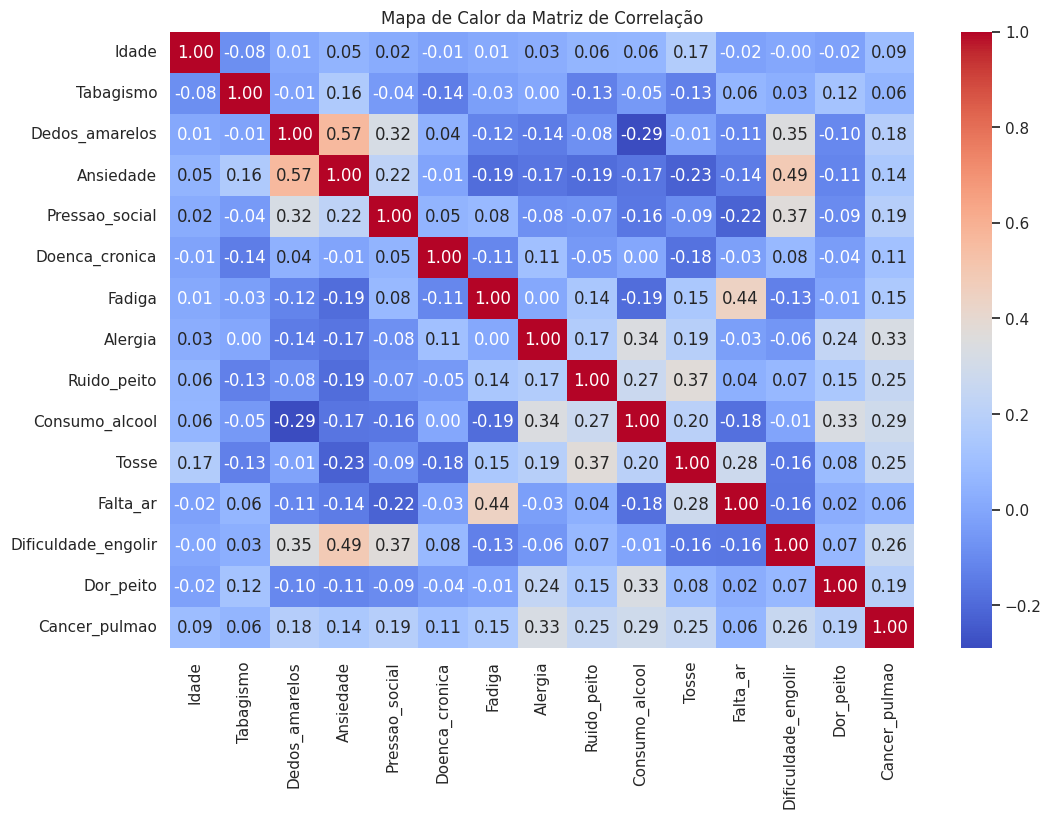

In [ ]:
# Mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_de_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()